# feature Selection
Selecting the appropriate feature for data analysis requires the knowledge of feature selection methods and some domain knowledge. Combining both allows us to choose the optimum features necessary for tasks.

In [14]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector #wrapper method for feature selection
from sklearn.linear_model import LinearRegression
import seaborn as sns
 

In [2]:
HousingP = pd.read_csv("HousingData.csv")

In [6]:
HousingP.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [26]:
#for frnaming coloumns in pd we can use rename or set-axis to rename all
HousingP.info()
HousingP.isnull().any()#checking null values and removing them(**)
HousingP.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Wrapper Method
The wrapper method requires a machine-learning algorithm to find the optimum features. This method generally has a high computational time. 


## Sequential feature selector

This is a greedy algorithm that sequentially checks the model's performance with each feature and sequentially adds to the features.

In [35]:
Attribute = HousingP.iloc[:,:13]
target = HousingP.iloc[:,-1]
Sfs = SequentialFeatureSelector(LinearRegression(),
                                  k_features = 10,
                                  forward = True,
                                  floating = False,
                                  scoring = 'r2')
Sfs.fit(Attribute,target)
sfs_result = pd.DataFrame(Sfs.subsets_).transpose()
sfs_result

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)","[0.21013813325242514, 0.54190683621638, -0.112...",0.22293,"(LSTAT,)"
2,"(10, 12)","[0.4661273389667262, 0.5088911614358224, 0.179...",0.396472,"(PTRATIO, LSTAT)"
3,"(3, 10, 12)","[0.5137676819294879, 0.48362796380553885, 0.22...",0.419265,"(CHAS, PTRATIO, LSTAT)"
4,"(1, 3, 10, 12)","[0.5133327595225368, 0.48847614737790557, 0.23...",0.424254,"(ZN, CHAS, PTRATIO, LSTAT)"
5,"(0, 1, 3, 10, 12)","[0.5086971431210954, 0.490100682842474, 0.2213...",0.418466,"(CRIM, ZN, CHAS, PTRATIO, LSTAT)"
6,"(0, 1, 3, 5, 10, 12)","[0.7340323137403271, 0.679120884276981, 0.4995...",0.427932,"(CRIM, ZN, CHAS, RM, PTRATIO, LSTAT)"
7,"(0, 1, 3, 5, 10, 11, 12)","[0.7254995454770403, 0.7036527875577943, 0.523...",0.45501,"(CRIM, ZN, CHAS, RM, PTRATIO, B, LSTAT)"
8,"(0, 1, 3, 5, 7, 10, 11, 12)","[0.6748889716339588, 0.704018167068265, 0.5779...",0.45146,"(CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT)"
9,"(0, 1, 3, 4, 5, 7, 10, 11, 12)","[0.6346947724509273, 0.7667936819045665, 0.561...",0.477801,"(CRIM, ZN, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
10,"(0, 1, 2, 3, 4, 5, 7, 10, 11, 12)","[0.6345413486323541, 0.7701713195149424, 0.567...",0.481953,"(CRIM, ZN, INDUS, CHAS, NOX, RM, DIS, PTRATIO,..."


this shows that best seven features are 0,1,3,5,10,11,12

[Sequential feature selector documentation](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#:~:text=Sequential%20feature%20selection%20algorithms%20are%20a%20family%20of,features%20that%20is%20most%20relevant%20to%20the%20problem.)


# Filter Methods

Filter methods are a set of statistical techniques required for measuring the importance of features in a dataset. It includes Correlation, Chi-Square test, information gain, etc. These methods are comparatively faster in terms of time complexity. 
>    · **Pearson’s correlation:** this method is used to calculate the correlation between continuous variables.

>   · **Linear Discriminant Analysis**: measures the correlation between continuous and categorical features.

>    · **Chi-square:** calculates the correlation between two or more categorical features.

 >   · **ANOVA:** is the same as Linear Discriminant Analysis apart from the fact that there are two independent categorical features and one continuous dependent feature.

* Computationally very fast;
* Avoids overfitting;
* Do not depend on the models, but only features;
* Based on different statistical methods
----
** These dont remove multi collinearity


<AxesSubplot:>

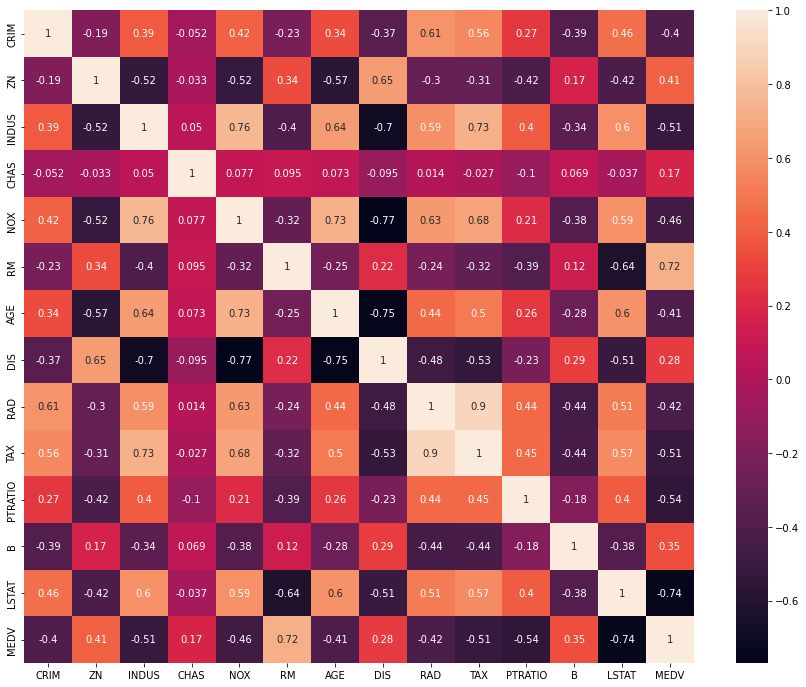

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = HousingP.corr()

plt.figure(figsize= (15,12))
sns.heatmap(correlation, annot=True)

RAD and TAX are highly correlated, and therefore, we can remove one with a low value of absolute correlation with the target variable (MEDV). "RAD" can be removed. Also, we can set a threshold value of the absolute correlation to remove the less informative features. For instance, if we select 0.40 correlation as a feature selection criteria for the modeling, we are left with 'INDUS,' 'NOX,' 'RM,' 'TAX,' 'PTRATIO,' 'LSTAT.' as the final set of features.  

# Embedded Methods

* **Combine the qualities of Filter and Wrapper methods.** 
* **Works  iteratively** (`building the models while also evaluating their performance`). 
* **Based on performance, the best set of parameters is chosen.** 
#### **Random Forest Feature Importance** 


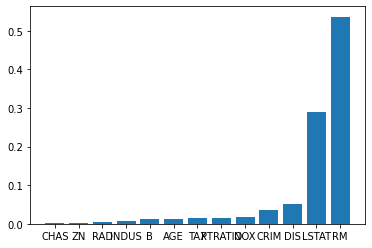

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1300)
rfr.fit(Attribute, target)

importance = rfr.feature_importances_

importance_df = pd.DataFrame({"Features": Attribute.columns, "Importance":importance})
importance_df = importance_df.sort_values("Importance")

plt.bar(importance_df["Features"], importance_df["Importance"])
plt.show()

### Feature Quality Assessment
This section deals with the quality of data. Data is prone to noise, human errors, scaling errors, and reading errors. Such errors induce inconsistency in the collected data. It is recommended to process the data to remove these inconsistencies, and we will do the same on the Advanced Regression house price dataset. 


#### Missing Values
* Row Elimination
* Imputation
    * numerical
        * mean/median()
        * forward and backward fill
    * Catagorical
        * frquent catogery 
        * missing

* Interpolation

In [39]:
# Mean Imputation
HousingP['MEDV']=HousingP['MEDV'].fillna(HousingP['MEDV'].mean())

In [ ]:
# Forward Fill
HousingP["MEDV"].fillna(method='ffill', inplace=True)

In [ ]:
# Backward Fill
HousingP["MEDV"].fillna(method='bfill', inplace=True)

In [ ]:
# Linear Interpolation
HousingP["MDEV"]= HousingP["MDEV"].interpolate()

In [ ]:
HousingP['Payment Method'] = HousingP['Payment Method'].fillna(HousingP['Payment Method'].mode().iloc[0])

In [ ]:
HousingP['Payment Method'] = HousingP['Payment Method'].fillna('Missing')

##### Outliers
* Statistical
    * IQR
    * Standard Deveation
* ML-ALgorithms


#### Duplicate items

#### Sampiling
